<!-- Student -->
# Introduction to Computational Physics - Week 7 ##

<!-- Student -->
## Table of contents week 7

Introduction to Computational Physics - Week 7: [>>](#Introduction-to-Computational-Physics---Week-7)  
-Table of contents week 7: [>>](#Table-of-contents-week-7)  
-Introduction to week 7: [>>](#Introduction-to-week-7)  
-Good coding practice: [>>](#Good-coding-practice)  
--Naming variables: [>>](#Naming-variables)  
--Comments on comments: [>>](#Comments-on-comments)  
--Week 7 exercise 1: [>>](#Week-7-exercise-1)  
--Week 7 exercise 1 answer: [>>](#Week-7-exercise-1-answer)  
--Don't hardwire numbers into code: [>>](#Don't-hardwire-numbers-into-code)  
-Debugging: [>>](#Debugging)  
--SyntaxError: [>>](#SyntaxError)  
--IndentationError: [>>](#IndentationError)  
--TabError: [>>](#TabError)  
--NameError: [>>](#NameError)  
--TypeError: [>>](#TypeError)  
--ValueError: [>>](#ValueError)  
--IndexError: [>>](#IndexError)  
--ZeroDivisionError: [>>](#ZeroDivisionError)  
--ModuleNotFoundError: [>>](#ModuleNotFoundError)  
--More error types: [>>](#More-error-types)  
-Code that won't compile: [>>](#Code-that-won't-compile)  
--Week 7 exercise 2: [>>](#Week-7-exercise-2)  
--Week 7 exercise 2 answer: [>>](#Week-7-exercise-2-answer)  
--Week 7 exercise 3: [>>](#Week-7-exercise-3)  
--Week 7 exercise 3 answer: [>>](#Week-7-exercise-3-answer)  
--Week 7 exercise 4: [>>](#Week-7-exercise-4)  
--Week 7 exercise 4 answer: [>>](#Week-7-exercise-4-answer)  
--Week 7 exercise 5: [>>](#Week-7-exercise-5)  
--Week 7 exercise 5 answer: [>>](#Week-7-exercise-5-answer)  
-Programs that start but don't finish: [>>](#Programs-that-start-but-don't-finish)  
--Week 7 exercise 6: [>>](#Week-7-exercise-6)  
--Week 7 exercise 6 answer: [>>](#Week-7-exercise-6-answer)  
--Views and copies of Numpy arrays: [>>](#Views-and-copies-of-Numpy-arrays)  
-Debugging problems associated with copies and views of Numpy arrays: [>>](#Debugging-problems-associated-with-copies-and-views-of-Numpy-arrays)  
-Programs that run but produce incorrect results: [>>](#Programs-that-run-but-produce-incorrect-results)  
-Using the assert statement: [>>](#Using-the-assert-statement)  
--Week 7 exercise 7: [>>](#Week-7-exercise-7)  
--Week 7 exercise 7 answer: [>>](#Week-7-exercise-7-answer)  
-Week 7 marks: [>>](#Week-7-marks)  

<!-- Student -->
## Introduction to week 7

This week we will look at some techniques for debugging programs, but before we do that, we will go through some hints on trying to reduce the number of bugs in our code in the first place!

## Good coding practice

### Naming variables

1) Use variable names that are self-explanatory and clearly different. It's not a good idea to use `X` and `x` as labels for arrays containing the measurements of the period of a pendulum and its mass, for example. Names like `periodArr` and `massArr` are much clearer. (Many Python programmers favour using `period_arr` and `mass_arr` to "camel case", as camel case is conventionally used for class names in Python, though usually with a leading capital letter, e.g. MyClass.) It often helps to indicate whether a variable is a single value or an array, e.g. `t` could be a single time and `tArr` or `t_arr` an array containing lots of times. Good variable names can save you having to write lots of comments!

2) If you are using the same quantity two or more times, don't give it a new name each time. That will just be confusing. For example, if you have an array of ten mass values, used three times, don't call it `massArray` the first time, `mass_arr` the second and `ten_masses` the third! 

3) Avoid upper case i and lower case l where the fact they look like 1 can be confusing. (A variable called `little` is OK, one called `big_l` is not; is it `big_l` or `big_1`?

4) The letters i, j and k are usually used as integer counters (e.g. in for loops).

### Comments on comments

1) It's a good idea to add units to your code. This can be done with a comment behind the quantity in question.

```Python
carSpeed = 33.2 # km per hour
hairThickness = 100 # um 
```

(Note, um is a frequently used substitute for $\mu \rm{m}$.)

2) With the exception of units (like the above), it is usually clearer to have spaces before (or before and after) comment lines, as in the examples below.

3) Ensure your comments provide useful information (i.e. explain the things that need to be explained but not the things that don't!). For example, this is a pointless comment:

```Python
#
# Print out the value of y
print("Value of y is",y)
```

Here is a slightly less obvious example of a poor comment. Explain what your code is supposed to do in a concise way. Usually, the nitty-gritty of things like how a numpy routine works are best left to the official documentation, particularly if the name makes it clear what the routine is doing!

```Python
#
# While the value of nRow is less than rowTest (set to 13 here) check how many non-zero 
# elements there are in row nRow of the two dimensional array shortData. As soon as the
# number of non-zero elements is bigger than nonZero (which is usually equal to 7), print
# out the value of nRow and leave the while loop. (The numpy routine count_nonzero() counts
# the number of entries in an array that are not zero.)
#
nRow = 0
nonZero = 7
rowTest = 13
shortData = np.zeros((rowTest + 2, nonZero + 2))
shortData[3, :] = 1.0
#
while nRow < rowTest:
    if np.count_nonzero(shortData, axis = 1)[nRow] > nonZero:
        print("nRow =",nRow)
        break
    nRow = nRow + 1
```

Better would be:

```Python
#
nRow = 0
nonZero = 7
rowTest = 13
shortData = np.zeros((rowTest + 2, nonZero + 2))
shortData[3, :] = 1.0
#
# Find row in shortData that contains more than nonZero elements which are not 0. 
while nRow < rowTest:
    if np.count_nonzero(shortData, axis = 1)[nRow] > nonZero: 
        print("nRow =",nRow)
        break
    nRow = nRow + 1
```

You can test the routine to see if it does what you think it should below!

In [1]:
# <!-- Student -->
#
import numpy as np
#
nRow = 0
nonZero = 7
rowTest = 13
shortData = np.zeros((rowTest + 2, nonZero + 2))
shortData[5, :] = 1.0
#
# Find first row in shortData with more than nonZero non-zero elements 
while nRow < rowTest:
    if np.count_nonzero(shortData, axis = 1)[nRow] > nonZero: 
        print("nRow =",nRow)
        break
    nRow = nRow + 1

nRow = 5


<!-- Student -->
### Week 7 exercise 1

Work out what the statement `nExc = int(np.cumprod(np.linspace(1, number, number))[number - 1])` does. Add an appropriate comment to the code below, or, better still, change the variable name so you don't need to add a comment! Print out an example.

In [1]:
# <!-- Student -->
#
import numpy as np
number = 10
nExc = int(np.cumprod(np.linspace(1, number, number))[number - 1])
print(nExc)

3628800


<!-- Demo -->
### Week 7 exercise 1 answer

In [3]:
# <!-- Demo -->
#
import numpy as np
number = 10
nFactorial = int(np.cumprod(np.linspace(1, number, number))[number - 1])
print(f"Factorial of {number:d} = {nFactorial:d}.")

Factorial of 10 = 3628800.


<!-- Student -->
### Don't hardwire numbers into code

Use variables rather than numbers to control the length of arrays, the number of iterations in loops and so on. If you define some arrays to be of length 10, and use `for` loops with upper limit 10 to manipulate them, you'll have to change all the 10s to 12s by hand if you later need arrays of length twelve. If you had used a variable, you would just have had to change 10 to 12 once.

## Debugging

We will consider three kinds of bug. The first type are the ones that prevent your code from compiling. The second are the bugs that cause it to fail while it's running. These types are both "safe", in the sense that you know something is wrong and you have to fix it before your program will work. More dangerous are the third type, where the program seems to work OK but sometimes does something you don't expect. One famous example caused the loss of NASA's 330 million dollar Mars Climate Orbiter. This happened when control software written by Lockheed calculated a thrust in pound-force seconds (the standard American unit) instead of newton-seconds (the SI unit that NASA had specified and used in their own software). The difference caused the Orbiter to get too close to Mars and it broke up in the planet's atmosphere. (Fortunately, the mistakes we make in Phys105 are unlikely to have such costly consequences!)

Python classifies errors as being of various types including:

### SyntaxError
What you have written doesn't satisfy the Python language rules (e.g. you are missing a bracket, or a comma is in an unexpected place).

### IndentationError
Inconsistent indentations have been detected, perhaps in a `for` loop or a function. 

### TabError
Seen when you mix spaces and tabs when indenting code in a function, loop, if statement etc.

### NameError
You have probably tried to use a variable you haven't defined. Often due to a spelling mistake or using a lower case letter where a capital was needed!

### TypeError
You have entered a float where a string was expected, or a float where an integer was needed, or something similar.

### ValueError
You have entered a value that doesn't allow the requested operation to be performed. E.g. you have entered `int("one")`. You can enter strings into the `int()` function, so this is not a *TypeError*, but Python doesn't understand what you want to get as an answer. If you had written `int('1')` that would be OK (it would give you the integer `1`), but if the meaning isn't clear, you will get a ValueError.

### IndexError
This is what happens, for example, if you try and access `myArray[17]` when `myArray` only has a length of six.

### ZeroDivisionError
Guess what this one means!

### ModuleNotFoundError
You get this if you ask Python to import a module and it can't find it. It's usually a spelling mistake!

### More error types
Further error types are discussed in the textbook, *A Student's Guide to Physical Modeling"*. 

## Code that won't compile

Let's look at some examples of things that can go wrong that stop your code compiling.

In [4]:
# <!-- Student -->
#
fig, ax = plt.subplots(figsize = (1, 1))

NameError: name 'plt' is not defined

<!-- Student -->
Python tries to tell us where there is a problem in the code and what that problem is. (Sometimes the messages are long, in which case the most important information is often at the top of the error messages - where the problem occurred - and at the bottom - what Python thinks was wrong). This one is a *NameError*, Python has bumped into an undefined name, and the mistake is easy to find. Python both manages to tell us where the problem is and give us a clear indication of what it is: "name 'plt' is not defined". The solution is to import matplotlib.pyplot...

In [5]:
# <!-- Student -->
#
import matplotlib.pyploy as plt
#
fig, ax = plt.subplots(figsize = (5, 7))

ModuleNotFoundError: No module named 'matplotlib.pyploy'

<!-- Student -->
### Week 7 exercise 2

Whoops, now Python can't find matplotlib.pyplot! What's wrong here?

<!-- Demo -->
### Week 7 exercise 2 answer

Spelling error!

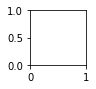

In [6]:
# <!-- Demo -->
#
import matplotlib.pyplot as plt
#
fig, ax = plt.subplots(figsize = (1, 1))

<!-- Student -->
Python can't always identify the location of an error. An error in one line may cause Python to identify an error in another, often the line after the one with the error.

In [7]:
# <!-- Student -->
#
xData = np.full((5, 6)
print("xData\n",xData)

SyntaxError: invalid syntax (<ipython-input-7-eacb6d88a24a>, line 4)

<!-- Student -->
This time the problem is identified as a *SyntaxError*, something about the program we have written doesn't obey the rules of the Python language. Here, the error is a missing bracket in line 3. Because there is no closing bracket, Python assumes that the second line is a continuation of the first, in which case the print statement is incorrect, so that is where the error is identified. (Note, if you put the cursor next to a bracket, its partner will be coloured green. Try this now! This helps you identify which bracket is missing its other half.)

Try and fix this one by adding the required bracket.

In [8]:
# <!-- Student -->
#
xData = np.full((5, 6))
print("xData\n",xData)

TypeError: full() missing 1 required positional argument: 'fill_value'

<!-- Student -->
This is another case where we have lice and fleas (a German saying meaning you can have more than one problem at once!). The second problem is a *TypeError*. Something has been given the wrong type. In this case, the location of the error is correctly identified, and the error message is also clear: the routine `np.full` needs an additional argument. The solution is to look up `np.full` in the [numpy documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.full.html) or to google something like *numpy full*. You'll then see that we need to specify the shape of the array we want to fill using a tuple as we've done, but we also need to tell numpy what we want to fill the array with. This can be fixed as below:

In [9]:
# <!-- Student -->
#
xData = np.full((5, 6), 13)
print("xData\n",xData)

xData
 [[13 13 13 13 13 13]
 [13 13 13 13 13 13]
 [13 13 13 13 13 13]
 [13 13 13 13 13 13]
 [13 13 13 13 13 13]]


<!-- Student -->
Other common errors include not declaring variables before they are used (perhaps because the spelling is wrong).

### Week 7 exercise 3

Fix the error in the code below.

In [10]:
# <!-- Student -->
#
littleArray = np.ones(3)
littleArray[0] = 2
LittleArray[1] = 1
littleArray[2] = 0

NameError: name 'LittleArray' is not defined

<!-- Demo -->
### Week 7 exercise 3 answer

LittleArray has capital L, should be small.

In [11]:
# <!-- Demo -->
#
littleArray = np.ones(3)
littleArray[0] = 2
littleArray[1] = 1
littleArray[2] = 0

<!-- Student -->
Error messages also tell us when the wrong type of brackets is used. Functions need round brackets around their arguments (here, the error message correctly identifies the location of the problem)...

In [12]:
# <!-- Student -->
#
def thisFunc[y]:
    q = y**2
    return q

SyntaxError: invalid syntax (<ipython-input-12-aa52d97c0ed6>, line 3)

<!-- Student -->
...and arrays, lists and tuples need square brackets around their indices (the error message doesn't identify the location of problem below).

In [13]:
# <!-- Student -->
#
littleArray(1) = 3.2

SyntaxError: cannot assign to function call (<ipython-input-13-d22b2a26d1a8>, line 3)

<!-- Student -->
### Week 7 exercise 4

Explain why Python has produced the error message above! Why is it talking about functions?

<!-- Demo -->
### Week 7 exercise 4 answer

Python thinks littleArray must be a function, because you have put round bracket after the name. You are not allowed to give a function a value using an assignment (`=`) statement, hence the error!

<!-- Student -->
The first problem above (the brackets) is fixed below:

In [14]:
# <!-- Student -->
#
index = 1.0
littleArray[index] = 7.2

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<!-- Student -->
### Week 7 exercise 5

Unfortunately, we see that again we have a second error in the code above. Fix it! 

<!-- Demo -->
### Week 7 exercise 5 answer

Indices must be integers, not floats.

In [15]:
# <!-- Demo -->
#
index = 1
littleArray[index] = 7.2

<!-- Student -->
## Programs that start but don't finish

Many of the problems that cause a program to start and then fail before it reaches its end are to do with array indices exceeding the boundaries of an array.

In [16]:
# <!-- Student -->
#
shortArray = np.ones(10)
for i in range(0,  10):
    shortArray[i] = i    
print("shortArray\n",shortArray)
newShortArray = np.ones(9)
for i in range(0,  10):
    newShortArray[i] = i
print("newShortArray\n",newShortArray)

shortArray
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


IndexError: index 9 is out of bounds for axis 0 with size 9

<!-- Student -->
The first section of the routine runs OK, then Python bumps into a problem in the second `for` loop. This is easily fixed, and also easily avoided if variables are used to control the length of arrays, the number of iterations in loops etc. as below:

In [17]:
# <!-- Student -->
#
nShort = 10
shortArray = np.ones(nShort)
for i in range(0,  nShort):
    shortArray[i] = i    
print("shortArray\n",shortArray)
newShortArray = np.ones(nShort)
for i in range(0,  nShort):
    newShortArray[i] = i
print("newShortArray\n",newShortArray)

shortArray
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
newShortArray
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


<!-- Student -->
### Week 7 exercise 6

This program is supposed to plot a number of parallel lines with changing colours, but doesn't work. Add comments to the code where necessary and find and fix the bug!

IndexError: list index out of range

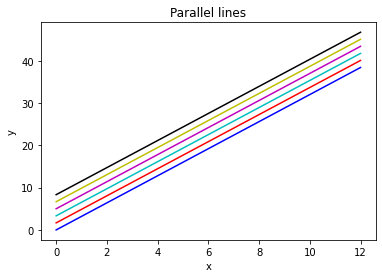

In [18]:
# <!-- Student -->
#
import matplotlib.pyplot as plt
%matplotlib inline
#
nPoints = 12
xArray = np.linspace(0, nPoints, nPoints + 1)
#
nLines = 10
maxConst = 15.0
constArr = np.linspace(0, maxConst, nLines)
grad = 3.2
yLines = np.zeros((nLines, nPoints + 1))
#
nCols = 6
colList = ['b', 'r', 'c', 'm', 'y', 'k']
iCol = 0
#
plt.figure(figsize = (6, 4))
plt.title("Parallel lines")
plt.xlabel("x")
plt.ylabel("y")
#
for n in range(0, nLines):
    yLines[n, :] = grad*xArray[:] + constArr[n]
    plt.plot(xArray, yLines[n, :], linestyle = '-', color = colList[iCol])
    iCol = iCol + 1
    if iCol > nCols:
        iCol = 0
#
plt.grid(color = 'g')
plt.show()

<!-- Demo -->
### Week 7 exercise 6 answer

The problem is that iCol exceeds the length of the list of colours by one. Fix by changing `if iCol > nCols` to `if iCol > nCOls - 1` (or something equivalent). The comments added are of course to some extent a matter of taste!

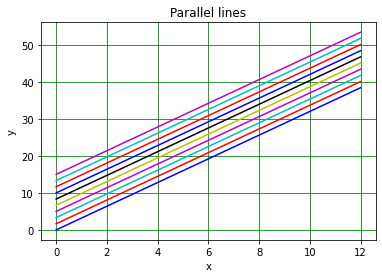

In [19]:
# <!-- Demo -->
#
import matplotlib.pyplot as plt
%matplotlib inline
#
nPoints = 12
xArray = np.linspace(0, nPoints, nPoints + 1)
#
nLines = 10
maxConst = 15.0
constArr = np.linspace(0, maxConst, nLines)
grad = 3.2
yLines = np.zeros((nLines, nPoints + 1))
#
# Make list of colours for plots
nCols = 6
colList = ['b', 'r', 'c', 'm', 'y', 'k']
iCol = 0
#
plt.figure(figsize = (6, 4))
plt.title("Parallel lines")
plt.xlabel("x")
plt.ylabel("y")
#
for n in range(0, nLines):
    #
    # Calculate y coords of lines and plot
    yLines[n, :] = grad*xArray[:] + constArr[n]
    plt.plot(xArray, yLines[n, :], linestyle = '-', color = colList[iCol])
    # 
    # Change plot colour and moake sure don't exceed length of colour list
    iCol = iCol + 1
    if iCol > nCols - 1:
        iCol = 0
#
plt.grid(color = 'g')
plt.show()

<!-- Student -->
### Views and copies of Numpy arrays

One feature of Numpy can cause problems that are difficult to diagnose. Look at the following code:

In [20]:
# <!-- Student -->
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
nA = 4
arrayA1 = np.linspace(0, nA - 1, nA)
print(" ")
print("arrayA1 =",arrayA1)
#
arrayA1new = arrayA1
print(" ")
print("arrayA1new =",arrayA1new)

 
arrayA1 = [0. 1. 2. 3.]
 
arrayA1new = [0. 1. 2. 3.]


<!-- Student -->
It appears that we have created a copy of `arrayA1`, called `arrayA1new`, but all is not quite as it seems! Lets us change an element of `arrayA1new` and see what happens to `arrayA1`:

In [21]:
# <!-- Student -->
#
arrayA1new[2] = 999
print(" ")
print("arrayA1 =",arrayA1)
print(" ")
print("arrayA1new =",arrayA1new)

 
arrayA1 = [  0.   1. 999.   3.]
 
arrayA1new = [  0.   1. 999.   3.]


<!-- Student -->
We see that both `arrayA1` and `arrayA1new` have changed!

The explanation is that we didn't create an independent copy of `array1`, but associated a new array name with the same region in the computer's memory (sometimes referred to as creating a new view of `array1`). (This is often useful, is very quick and doesn't use up any storage space, so it's a sensible thing to be able to do!) Hence, changing the values stored in the region of memory associated with `array1` and `array1new` affected both arrays. 

What do we do if we want a "true" copy of an array, in a new region of memory? Here are two ways we can do this, first using the `copy()` method:

In [22]:
# <!-- Student -->
#
nB = 5
arrayB1 = np.linspace(0, nB - 1, nB)
print(" ")
print("arrayB1 =",arrayB1)
#
arrayB1new = arrayB1.copy()
print(" ")
print("arrayB1new =",arrayB1new)

 
arrayB1 = [0. 1. 2. 3. 4.]
 
arrayB1new = [0. 1. 2. 3. 4.]


<!-- Student -->
Check that these two arrays are independent:

In [23]:
# <!-- Student -->
#
arrayB1new[2] = 999
print(" ")
print("arrayB1 =",arrayB1)
print(" ")
print("arrayB1new =",arrayB1new)

 
arrayB1 = [0. 1. 2. 3. 4.]
 
arrayB1new = [  0.   1. 999.   3.   4.]


<!-- Student -->
In this case, changing `arrayB1new` does not affect `arrayB1`.

The second way of making a copy of an array is as follows:

In [24]:
# <!-- Student -->
#
nC = 3
arrayC1 = np.linspace(0, nC - 1, nC)
print(" ")
print("arrayC1 =",arrayC1)
#
arrayC1new = np.zeros(nC)
arrayC1new[:] = arrayC1[:]
print(" ")
print("arrayC1new =",arrayC1new)

 
arrayC1 = [0. 1. 2.]
 
arrayC1new = [0. 1. 2.]


In [25]:
# <!-- Student -->
#
arrayC1new[2] = 999
print(" ")
print("arrayC1 =",arrayC1)
print(" ")
print("arrayC1new =",arrayC1new)

 
arrayC1 = [0. 1. 2.]
 
arrayC1new = [  0.   1. 999.]


<!-- Student -->
Note that you have to define `arrayC1new` (in the above case using `np.zeros(nC)`) before the statement `arrayC1new[:] = arrayC1[:]`. Python needs to reserve the space in memory for the new array (and know how long it is) before is can make the "true" copy. (We didn't have to define `array1new` before we wrote `arrayA1new = arrayA1` because we weren't going to be using any more memory!)

## Debugging problems associated with copies and views of Numpy arrays

The above can lead to errors that can be hard to diagnose; see the example below!

 
arrayA1 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Length of arrayA1 10
 
arrayA1new [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Length of arrayA1new 10
 
arrayB [0. 1. 2.]
Length of arrayB 3
Plot arrayA1 against arrayA1new - you might think this should work!


ValueError: x and y must have same first dimension, but have shapes (10,) and (3,)

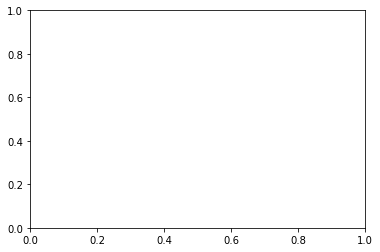

In [26]:
# <!-- Student -->
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
nA = 10
arrayA1 = np.linspace(0, nA - 1, nA)
print(" ")
print("arrayA1",arrayA1)
print("Length of arrayA1",len(arrayA1))
#
arrayA1new = np.linspace(0, nA - 1, nA)
print(" ")
print("arrayA1new",arrayA1new)
print("Length of arrayA1new",len(arrayA1new))
#
nB = 3
arrayB = np.linspace(0, nB - 1, nB)
print(" ")
print("arrayB",arrayB)
print("Length of arrayB",len(arrayB))
#
arrayA1new=2*arrayB
#
print("Plot arrayA1 against arrayA1new - you might think this should work!")
plt.figure(figsize = (6, 4))
plt.plot(arrayA1, arrayA1new)
plt.show()

<!-- Student -->

Python tells us what the error is (`x`, which is `arrayA1` and `y`, which is `arrayA1new` have different dimensions) but they shouldn't have according to their respective declarations! What Python has done is to create `arrayA1new` with length 10, but then changed `arrayA1new` to be associated with `arrayA1` (a view, not a copy!), resetting its dimensions, in the expression `arrayA1new = 2*arrayB`. We can check this is the case as follows:

In [30]:
# <!-- Student -->
#
print(" ")
print("New arrayA1",arrayA1new)
print("Length of new arrayA1",len(arrayA1new))

 
New arrayA1 [0. 2. 4.]
Length of new arrayA1 3


Python does this for views where the array lengths are unambiguous. In the following case, the quantities on the right-hand side (RHS) all have the same dimension, so the dimension of `arrayA` (on the LHS) is changed to match those of `arrayB` and `arrayC` (on the RHS).

In [31]:
# <!-- Student -->
#
arrayA = np.zeros(3)
print(arrayA)
arrayB = np.ones(4)
print(arrayB)
arrayC = np.ones(4)
print(arrayC)
arrayA = 2*arrayB + arrayC
print(arrayA)

[0. 0. 0.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[3. 3. 3. 3.]


<!-- Student -->
If you explicitly tell Python to loop through all the elements in the arrays on the LHS and RHS (i.e. you make a true copy), it will no longer modify the array lengths. Compare what we have seen above to what happens below...

In [32]:
# <!-- Student -->
#
arrayA = np.zeros(3)
print(arrayA)
arrayB = np.ones(4)
print(arrayB)
arrayC = np.ones(4)
print(arrayC)
arrayA[:] = 2*arrayB[:] + arrayC[:]
print(arrayA)

[0. 0. 0.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]


ValueError: could not broadcast input array from shape (4) into shape (3)

<!-- Student -->

If you aren't sure what Python is doing, or you get error messages that make you think something like the above is going on, print out the length of your arrays using `len(array)` and check that their dimensions are what you expect. (Use `array.shape` for  multidimensional arrays.)

<!-- Student -->
## Programs that run but produce incorrect results

As we have mentioned above, bugs which don't cause the program to crash are the most dangerous. They can go unrecognised for years and then pop up and cause a disaster. Books have been written on how to validate code, i.e. to check it does what it should in all circumstances. There are various things you can try to avoid problems (which, by the way, will also help track down bugs that do cause crashes!):

* Read your code carefully.

* When writing a program, do it in steps and test each step.

* Test your code on examples where you know what the answer should be and check you get what you expect!

* Print out the values of variables during running and check that they are as you expect. Do the same for variables after your code has run (the last values will be saved).

* Plot graphs that show your intermediate and final results. Are these sensible? 

* Explain your code to someone else. (If there is no-one around, explain it to an imaginary friend!) It's surprising how often this helps you spot a mistake in your logic.

* Look to see if your problem has been encountered before (try google, or look on online forums like stackoverflow.com).

* Use the `assert` statement in your code (described below) to check that things you think should be true really are true!

## Using the assert statement

The assert statement is a debugging tool that is built into Python. It can be used as illustrated in the following example.

Suppose we are calculating the roots of a number of quadratic equations, $ax^2 + bx + c = 0$, with various values of $a$, $b$ and $c$. We think all the roots should be real. We could try and do this using the following code.

In [33]:
# <!-- Student -->
#
nQuadEqs = 4
aArr = np.linspace(1.0, 4.0, nQuadEqs)
b = 2.0
c = 3.0
# 
for n in range(0, nQuadEqs):
    discrim = np.sqrt(b**2 - 3*aArr[n]*c)
    root1 = (-b + discrim)/(2*aArr[n])
    root2 = (-b - discrim)/(2*aArr[n])
    print(f"For a ={aArr[n]:.2f}, b = {b:.2f} and c = {c:.2f}, roots are {root1:.2f} and {root2:.2f}.")

For a =1.00, b = 2.00 and c = 3.00, roots are nan and nan.
For a =2.00, b = 2.00 and c = 3.00, roots are nan and nan.
For a =3.00, b = 2.00 and c = 3.00, roots are nan and nan.
For a =4.00, b = 2.00 and c = 3.00, roots are nan and nan.


<ipython-input-33-ee6c33918fa1>:9: RuntimeWarning: invalid value encountered in sqrt
  discrim = np.sqrt(b**2 - 3*aArr[n]*c)


<!-- Student -->
The roots are all given as `nan`. This is Pythonese for *not a number*. We get a strong hint as to where the problem is occurring: *RuntimeWarning: invalid value encountered in sqrt*. It looks as though there is something wrong with the calculation of `discrim`, and of course taking the square root of a negative number might be the problem. (Python does know about imaginary numbers, but the code we have written doesn't deal with them correctly!) We can check this as follows:

In [34]:
# <!-- Student -->
#
nQuadEqs = 4
aArr = np.linspace(1.0, 4.0, nQuadEqs)
b = 2.0
c = 3.0
# 
for n in range(0, nQuadEqs):
    discrim = b**2 - 3*aArr[n]*c
    assert (discrim > 0), f"Bumped into negative discrim (= {discrim:5.3f}), can't take sqrt!"
    root1 = (-b + np.sqrt(discrim))/(2*aArr[n])
    root2 = (-b - np.sqrt(discrim))/(2*aArr[n])
    print("For a ={:.2f}, b = {:.2f} and c = {:.2f}, roots are {:.2f} and {:.2f}.".format(aArr[n], b, c, root1, root2))

AssertionError: Bumped into negative discrim (= -5.000), can't take sqrt!

<!-- Student -->
If the discriminant is negative, the `assert` statement is `False`, so the error message we have written gets printed out and the program stops. 

Note, if you prefer, you can use a normal `if` statement together with the routine sys.exit(), as follows.

```Python
import sys
#
if discrim < 0:
    sys.exit("Bumped into negative discrim!")
```

However, the `assert` statement is quicker when you are debugging!

In the code in the cell above, one error is that we have used the wrong value of $c$; we should have $c = -3$ and have put $c = 3$ instead.

### Week 7 exercise 7

Copy the above code into the cell below, correct the value of `c` and run it. It seems to work OK, but something is still wrong. Find out what the problem is and fix it!

<!-- Demo -->
### Week 7 exercise 7 answer

After changing `c` to -3, the code runs OK, but the formula for the discriminant is wrong, so the roots are incorrect. Change `discrim = b**2 - 3*aArr[n]*c` to `discrim = b**2 - 4*aArr[n]*c`.

In [35]:
# <!-- Demo -->
#
nQuadEqs = 4
aArr = np.linspace(1.0, 4.0, nQuadEqs)
b = 2.0
c = -3.0
# 
for n in range(0, nQuadEqs):
    discrim = b**2 - 3*aArr[n]*c
    assert (discrim > 0), "Bumped into negative discrim ({:5.3f}), can't take sqrt!".format(discrim)
    root1 = (-b + np.sqrt(discrim))/(2*aArr[n])
    root2 = (-b - np.sqrt(discrim))/(2*aArr[n])
    print("For a ={:.2f}, b = {:.2f} and c = {:.2f}, roots are {:.2f} and {:.2f}.".format(aArr[n], b, c, root1, root2))

For a =1.00, b = 2.00 and c = -3.00, roots are 0.80 and -2.80.
For a =2.00, b = 2.00 and c = -3.00, roots are 0.67 and -1.67.
For a =3.00, b = 2.00 and c = -3.00, roots are 0.59 and -1.26.
For a =4.00, b = 2.00 and c = -3.00, roots are 0.54 and -1.04.


<!-- Demo -->
## Week 7 marks

|Exercise   | Mark    | Comments                             |
|-----------|---------|--------------------------------------|
| 1         | 2       |                                      |
| 2         | 1       |                                      |
| 3         | 1       |                                      |
| 4         | 1       |                                      |
| 5         | 1       |                                      |
| 6         | 3       |                                      |
| 7         | 1       |                                      |
| **Total** | **10**  |                                      |